In [74]:
#Step 1 (5 points):
# Import libraries
import os
import nltk
import wordcloud
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.util import ngrams
import sqlite3

# read the file into a corpus
corpus = PlaintextCorpusReader (os.getcwd(), 'alice.txt')

# print the content of the corpus
print(corpus.raw())

CHAPTER I.
Down the Rabbit-Hole
Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, “and what is the use of a book,” thought Alice “without pictures or conversations?”

So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.

There was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, “Oh dear! Oh dear! I shall be late!” (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a watch out of its waistcoa

In [78]:
#Step 2 (5 points):
# Find the number of words, sentences, and paragraphs

# extract the file ids
print ('Files in the corpus: ', corpus.fileids())

# extract words
words = corpus.words()
print('# of words: ', len(words))

# extract the sentences from the corpus
sentences = corpus.sents()
print('# of sentences: ', len(sentences))

# extract the paragraphs from this corpus
paragraphs = corpus.paras()
print('# of paragraphs: ', len(paragraphs))

Files in the corpus:  ['alice.txt']
# of words:  34109
# of sentences:  1347
# of paragraphs:  794


In [132]:
#Step 3 (5 points):
# Find the frequency distribution of words
# Get the top 20 words in the text
# Find the frequency of 'Alice.'

# find the frequency distribution of the words
course_freq = nltk.FreqDist (corpus.words())
# print the most commonly used words
print ('Top 20 words: ', course_freq.most_common(20))
# find the distribution for a specific word
print ('Distribution for Alice.: ', course_freq.get('Alice.'))
print ('Distribution for Alice: ', course_freq.get('Alice'))

Top 20 words:  [(',', 1996), ('the', 1533), ('“', 1082), ('and', 804), ('.', 763), ('to', 728), ('’', 658), ('a', 617), ('I', 545), ('it', 530), ('she', 513), ('of', 502), ('said', 458), (',”', 403), ('Alice', 397), ('in', 357), ('was', 356), ('you', 356), ('that', 286), ('!”', 282)]
Distribution for Alice.:  None
Distribution for Alice:  397


In [140]:
#Step 4 (10 points):

# Read data file into tokens, print the first 20 tokens, and the total number of tokens
base_file = open (os.getcwd() + '/alice.txt', 'rt')
raw_text = base_file.read()
base_file.close()
token_list = nltk.word_tokenize (raw_text)
print ('Token list: ', token_list[:20])
print('Total tokens: ', len(token_list))

Token list:  ['CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the']
Total tokens:  34519


In [144]:
# Use the Punkt library to remove punctuation marks, print total tokens after the removal of punctuation marks
token_list2 = list (filter (lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, token_list))
#print ('Token List after removing punctuation: ', token_list2[:20])
print ('Total tokens after punctuation removed: ', len(token_list2))

# Convert to lowercase
token_list3 = [word.lower() for word in token_list2]
#print ('Token List after case conversion: ', token_list3[:20])
print ('Total tokens after case conversion: ', len(token_list3))

# Remove stopwords
from nltk.corpus import stopwords
token_list4 = list (filter (lambda token: token not in stopwords.words('english'), token_list3))
#print ('Token List after removing stopwords: ', token_list4[:20])
print ('Total tokens after removing stopwords: ', len(token_list4))


Total tokens after punctuation removed:  27057
Total tokens after case conversion:  27057
Total tokens after removing stopwords:  12218


In [87]:
#Step 5 (5 points):
# Use Wordnet library to map words to their lemmatized form and print the number of words after lemmatization
stemmer = PorterStemmer ()
token_list5 = [stemmer.stem(word) for word in token_list4]
#print ('Token list after stemming:', token_list5)
print ('Total tokens after stemming: ', len(token_list5))
lemmatizer = WordNetLemmatizer ()
token_list6 = [lemmatizer.lemmatize(word) for word in token_list4]
#print ('Token list after lemmatization:', token_list6)
print ('Total tokens after lemmatization: ', len(token_list6))

Total tokens after stemming:  12218
Total tokens after lemmatization:  12218


In [89]:
#Step 6 (5 points):
# Find bigrams and print the 10 most common bigrams
bigrams = ngrams (token_list6 , 2)
print('Most common bigrams: ')
print(Counter(bigrams).most_common(10))

# Find trigrams and print the 10 most common trigrams
trigrams = ngrams (token_list6 , 3)
print('Most common trigrams: ')
print(Counter(trigrams).most_common(10))

Most common bigrams: 
[(('said', 'alice'), 123), (('mock', 'turtle'), 56), (('march', 'hare'), 31), (('said', 'king'), 29), (('thought', 'alice'), 26), (('white', 'rabbit'), 22), (('said', 'hatter'), 21), (('said', 'mock'), 20), (('said', 'caterpillar'), 18), (('said', 'gryphon'), 18)]
Most common trigrams: 
[(('said', 'mock', 'turtle'), 20), (('said', 'march', 'hare'), 9), (('poor', 'little', 'thing'), 6), (('little', 'golden', 'key'), 5), (('certainly', 'said', 'alice'), 5), (('white', 'kid', 'glove'), 5), (('mock', 'turtle', 'said'), 5), (('know', 'said', 'alice'), 4), (('might', 'well', 'say'), 4), (('said', 'caterpillar', 'well'), 4)]


In [108]:
#Step 7 (5 points):
# Tag the token list after stopword list removal for parts of speech
nltk.pos_tag (token_list4)[:10]

# How many verbs were used in this text? POS tag starts with a 'V'
tag_list = nltk.pos_tag (token_list4)
verbs = sum(1 for word, tag in tag_list if tag.startswith('V'))
print('Number of verbs: ', verbs)

Number of verbs:  3467


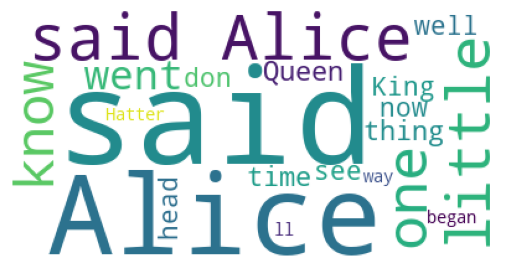

In [102]:
#Step 8 (5 points):
# Generate and display a word cloud of the top 20 words after stopword removal
with open ('alice.txt', 'r') as fh:
    filedata = fh.read()
stopwords = set (STOPWORDS)
stopwords.update ('many', 'using', 'want', 'value')
wordcloud = WordCloud(stopwords = stopwords, max_words = 20, \
                        background_color = 'white').generate(filedata)
plt.imshow (wordcloud)
plt.axis ('off')
plt.show()

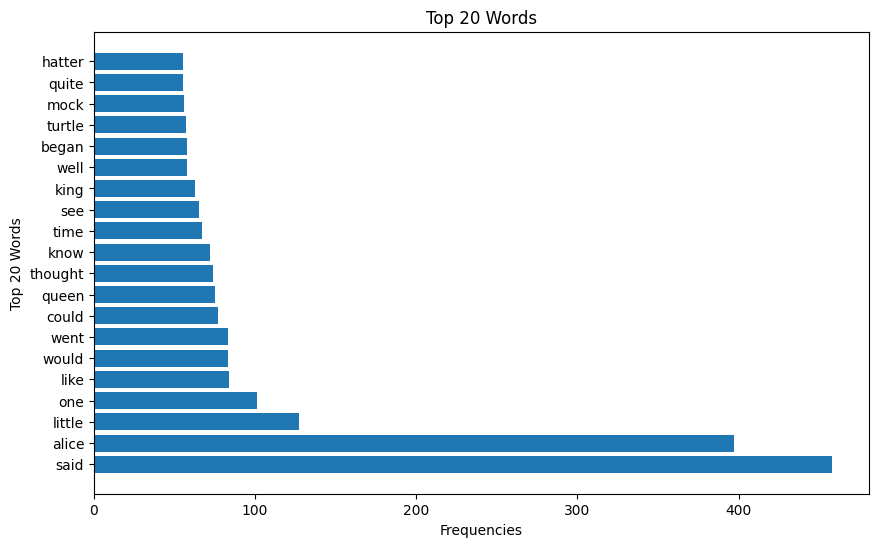

In [146]:
#Step 9 (5 points):
# Draw a horizontal bar chart of the frequencies of the top 20 words after stopword removal
counter = Counter(token_list4)
top_words = counter.most_common(20)
words, frequencies = zip(*top_words)
plt.figure(figsize=(10, 6))
plt.barh(words, frequencies)
plt.xlabel('Frequencies')
plt.ylabel('Top 20 Words')
plt.title('Top 20 Words')

plt.show()